# USD-MNT Exchange Rate Forecast Follow Up

The purpose of this notebook is to follow up on the December 2018 article I wrote using machine learning to forecast USD-MNT exchange rates. 

The previous forecast has been saved as a CSV file names 'forecast.csv'. The entire timeseries of USD-MNT exchange rates is saved as 'USD-MNT.csv'.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

plt.style.use('../../mds.mplstyle')

In [2]:
usd = pd.read_csv('USD-MNT.csv', parse_dates=['Date'], index_col='Date', thousands=',')
forecast = pd.read_csv('../Part 2 - Machine Learning Model/forecast.csv', parse_dates=['variable'], index_col='variable', thousands=',')

In [3]:
usd.head()

,USD
Date,
2008-01-02,1169.97
2008-01-03,1169.97
2008-01-04,1169.97
2008-01-07,1169.81
2008-01-08,1170.11


In [4]:
forecast.head()

,value
variable,
2018-09-30,2429.98600
2018-12-31,2420.26575
2019-06-30,2496.68010


It turns out we have some NaN values. Let's drop them and then visualize the forecast. 

In [5]:
nan = lambda usd: usd[usd.isnull().any(axis=1)]

In [6]:
nan(usd)

,USD
Date,
2019-01-12,NaN
2019-01-13,NaN
2019-02-03,NaN


In [7]:
usd = usd.dropna()

In [8]:
usd.shape

(3922, 1)

In [9]:
usd.index[-365:]

DatetimeIndex(['2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
               '2018-09-26', '2018-09-27',
               ...
               '2019-09-15', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22',
               '2019-09-23', '2019-09-24'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [10]:
usd['USD'][-365:]

Date
2018-09-18    2503.41
2018-09-19    2511.22
2018-09-20    2515.22
2018-09-21    2521.27
2018-09-22    2521.27
               ...   
2019-09-20    2667.91
2019-09-21    2667.91
2019-09-22    2667.91
2019-09-23    2667.43
2019-09-24    2666.66
Name: USD, Length: 365, dtype: float64

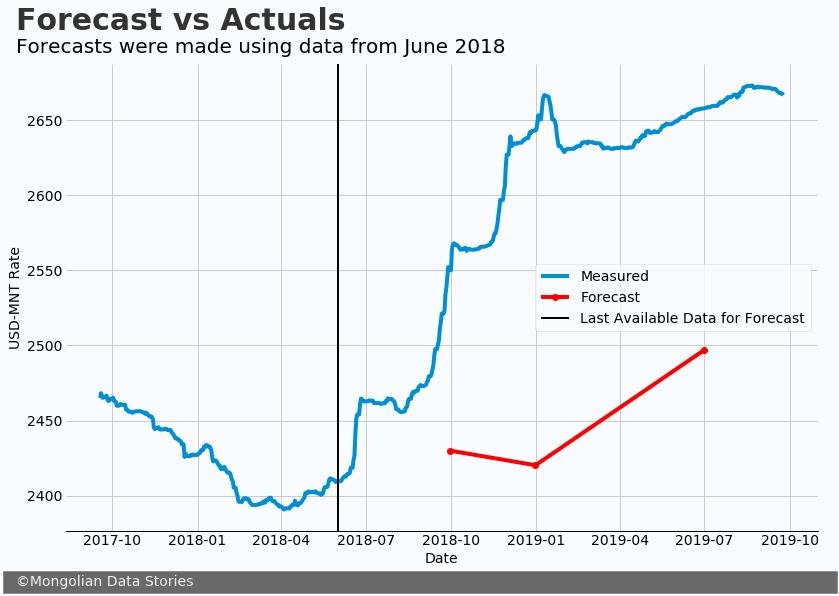

In [39]:
fig, ax = plt.subplots()
ax.plot(usd.index[-730:], usd['USD'][-730:])
ax.plot(forecast.index, forecast['value'], color='red',marker='o')
ax.axvline(x='2018-06', color='black', linewidth=2)
ax.set_xlabel('Date')
ax.set_ylabel('USD-MNT Rate')
ax.legend(labels=['Measured', 'Forecast', 'Last Available Data for Forecast'])
ax.text(x = 736500, y = 2710, s = 'Forecast vs Actuals', fontsize=30, weight='bold', alpha=.8)
ax.text(x = 736500, y = 2695, s= 'Forecasts were made using data from June 2018', fontsize=20)
ax.text(x = 736490, y = 2340, s = '  ©Mongolian Data Stories                                                                                                                                              ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('forecast-actuals.png', dpi = 300, bbox_inches="tight")